<a href="https://colab.research.google.com/github/Fleur09/DeepLearning/blob/master/Deep_Learning_3fev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!nvidia-smi


Mon Feb  3 15:52:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    357MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import tensorflow as tf
import numpy as np

In [23]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist") 
train_data = mnist.train.images # Returns np.array 
train_labels = np.asarray(mnist.train.labels , dtype=np.int32) 
eval_data = mnist.test.images # Returns np.array 
eval_labels = np.asarray(mnist.test.labels , dtype=np.int32)


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [24]:
print(train_data.shape)

(55000, 784)


label=7
label=3
label=4
label=6
label=1
label=8
label=1
label=0
label=9
label=8


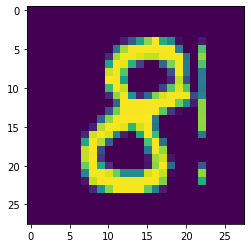

In [25]:
import matplotlib.pyplot as plt

for i in range (0,10):
  im = np.reshape(train_data[i],(28,28))
  plt.imshow(im)
  print("label="+str(train_labels[i]))
  #plt.show()

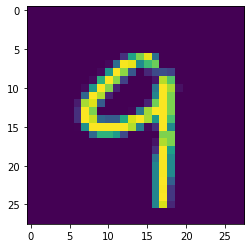

In [26]:
for i in range (0,10):
  im = np.reshape(train_data[train_labels==i,:][0],(28,28))
  plt.imshow(im)
  #plt.show()

In [0]:
data=tf.placeholder(tf.float32, shape=(None, 28*28))
label=tf.placeholder(tf.float32 , shape=(None, 10)) # None car on connait pas le nb de batch et 10 car... (on encode en 0001000000)

In [0]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.01)
  return tf.Variable(initial)

def bias_variable(shape):
  initial= tf.constant(0.0, shape=shape)
  return tf.Variable(initial)

W_fcl1=weight_variable([28*28, 128])
b_fcl1=bias_variable([128])
p1=tf.nn.tanh(tf.matmul(data, W_fcl1)+b_fcl1)

In [0]:
W_fcl2=weight_variable([128, 64]) # 128 est le nbr de sorties de la couche précédente, 64 est arbitraire
b_fcl2=bias_variable([64])
p2=tf.nn.tanh(tf.matmul(p1, W_fcl2)+b_fcl2)

In [0]:
W_fcl3=weight_variable([64, 10]) 
b_fcl3=bias_variable([10])
p3=tf.matmul(p2, W_fcl3)+b_fcl3

In [0]:
softmax_loss=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=p3))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(softmax_loss)

sess=tf.Session()
init=tf.initialize_all_variables()
sess.run(init)

In [0]:
#Vector 42 x (28*28)
#Labels 42 x (10)

In [0]:
import random

def getTrainBatch(size):
  z=np.zeros((size, 28*28))
  l=np.zeros((size,10))
  for i in range(0, size):
    r=random.randint(0, train_data.shape[0]-1)
    z[i]=train_data[r]
    l[i, train_labels[r]]=1
  return z, l


In [0]:
for i in range(10000):
  im, l=getTrainBatch(42)
  #tmp=sess.run(train, feed_dict={data:im, label:l})   # si on veut activer seulement p3 on met p3 à la place de train
  #tmp   Ici si on met train on ne retourne rien
  # donc on met...
  loss=sess.run([softmax_loss,train], feed_dict={data:im, label:l}) 
  #print(loss)

  if i%1000==0:
    #Base de test
    pred=sess.run(p3, feed_dict={data:eval_data}) 
    argmax=np.argmax(pred, axis=1)



In [0]:
argmax